Descriptive Statistics:
            mean  median       std
DO      4.624397  3.9950  2.661283
TNSWFB  0.701638  0.6600  0.204659
TPSWFB  0.007677  0.0066  0.003855


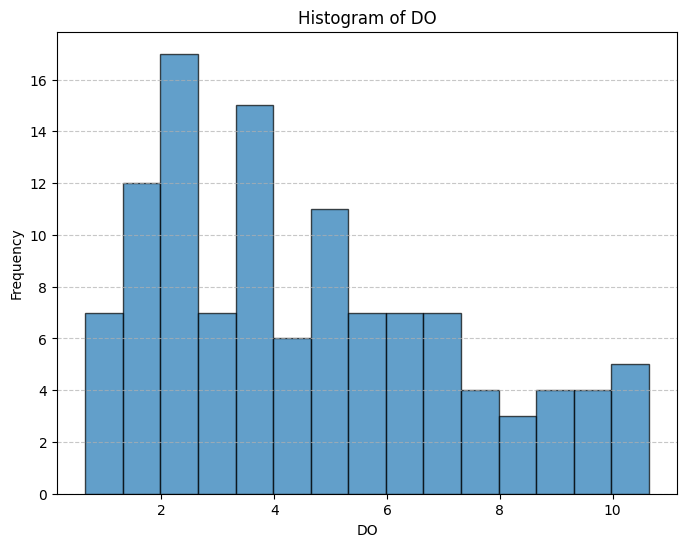

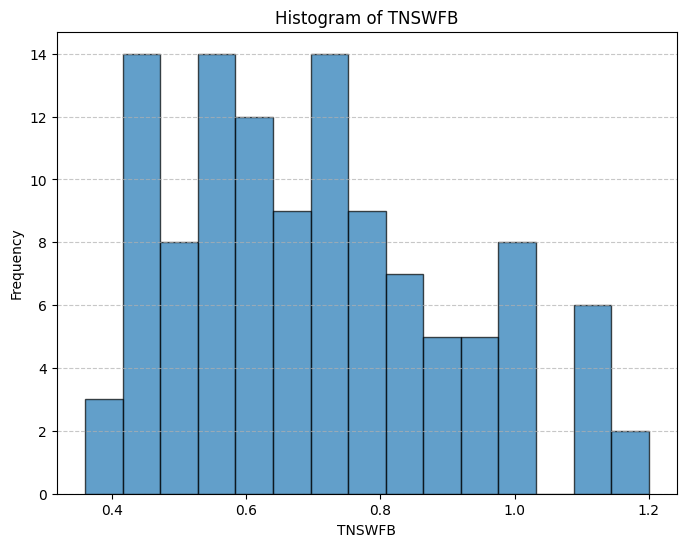

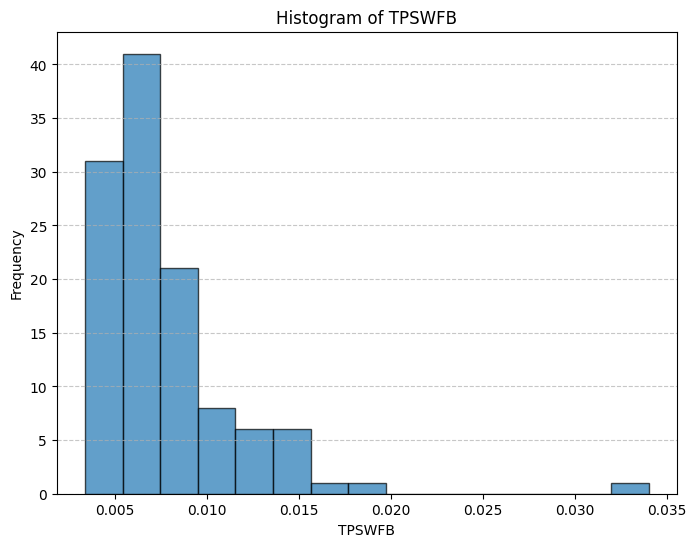

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Insert txt file and read it as tab delimited
file = "epa_data_condensed.txt"
data = pd.read_csv(file, delimiter ="\t", skiprows=1)
data.columns = ['STATION', 'DATE', 'TIME', 'DO', 'TNSWFB', 'TPSWFB']

# Convert the columns to numbers
data['DO'] = pd.to_numeric(data['DO'], errors='coerce')
data['TNSWFB'] = pd.to_numeric(data['TNSWFB'], errors='coerce')
data['TPSWFB'] = pd.to_numeric(data['TPSWFB'], errors='coerce')

# Remove any rows with missing data
data_cleaned = data[['DO', 'TNSWFB', 'TPSWFB']].dropna()

# Compute statistics
stats = data_cleaned.describe().T
stats['median'] = data_cleaned.median()
stats = stats[['mean', 'median', 'std']]
print("Descriptive Statistics:")
print(stats)

variables = ['DO', 'TNSWFB', 'TPSWFB']

# Create histograms
for var in variables:
    plt.figure(figsize=(8, 6))
    plt.hist(data_cleaned[var], bins=15, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    


Correlation Coefficients:
Pearson correlation between TNSWFB and DO: -0.028
Spearman correlation between TNSWFB and DO: -0.024
Pearson correlation between TPSWFB and DO: -0.248
Spearman correlation between TPSWFB and DO: -0.292


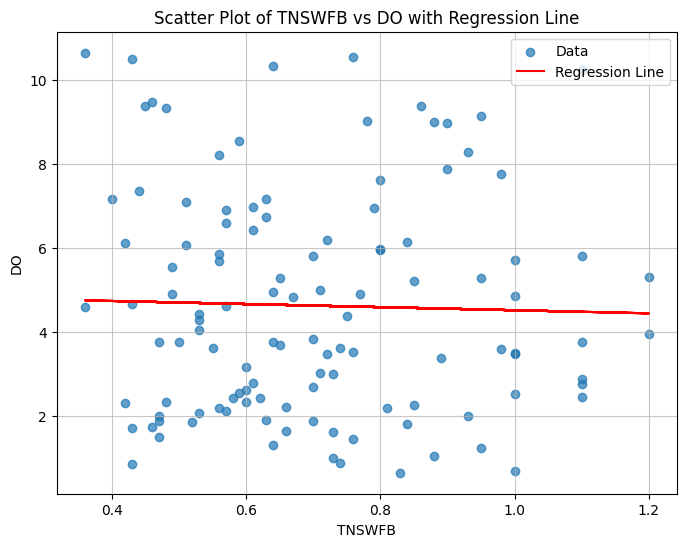

Linear Regression for TNSWFB vs DO:
Slope: -0.367, Intercept: 4.882


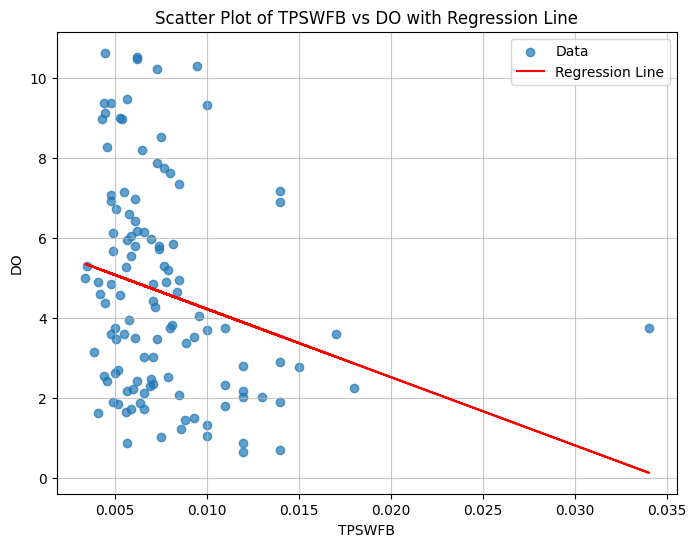

Linear Regression for TPSWFB vs DO:
Slope: -170.918, Intercept: 5.936


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
import numpy as np

# Insert file name so it can be read
file_path = "epa_data_condensed.txt"
data = pd.read_csv(file_path, delimiter='\t', skiprows=1)
data.columns = ['STATION', 'DATE', 'TIME', 'DO', 'TNSWFB', 'TPSWFB']

# Convert columns to numbers
data['DO'] = pd.to_numeric(data['DO'], errors='coerce')
data['TNSWFB'] = pd.to_numeric(data['TNSWFB'], errors='coerce')
data['TPSWFB'] = pd.to_numeric(data['TPSWFB'], errors='coerce')

# Remove the missing data rows
data_cleaned = data[['DO', 'TNSWFB', 'TPSWFB']].dropna()

# Calculate Pearson and Spearman Correlation Coefficients
pearson_TN_DO, _ = pearsonr(data_cleaned['TNSWFB'], data_cleaned['DO'])
spearman_TN_DO, _ = spearmanr(data_cleaned['TNSWFB'], data_cleaned['DO'])
pearson_TP_DO, _ = pearsonr(data_cleaned['TPSWFB'], data_cleaned['DO'])
spearman_TP_DO, _ = spearmanr(data_cleaned['TPSWFB'], data_cleaned['DO'])

print("Correlation Coefficients:")
print(f"Pearson correlation between TNSWFB and DO: {pearson_TN_DO:.3f}")
print(f"Spearman correlation between TNSWFB and DO: {spearman_TN_DO:.3f}")
print(f"Pearson correlation between TPSWFB and DO: {pearson_TP_DO:.3f}")
print(f"Spearman correlation between TPSWFB and DO: {spearman_TP_DO:.3f}")


variables = [('TNSWFB', 'DO'), ('TPSWFB', 'DO')]

for x_var, y_var in variables:
    X = data_cleaned[[x_var]].values
    y = data_cleaned[y_var].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Create scatter plot with regression 
    plt.figure(figsize=(8, 6))
    plt.scatter(data_cleaned[x_var], data_cleaned[y_var], alpha=0.7, label='Data')
    plt.plot(data_cleaned[x_var], y_pred, color='red', label='Regression Line')
    plt.title(f"Scatter Plot of {x_var} vs {y_var} with Regression Line")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend()
    plt.grid(alpha=0.7)
    plt.show()

    # Print the regression coefficients
    print(f"Linear Regression for {x_var} vs {y_var}:")
    print(f"Slope: {model.coef_[0]:.3f}, Intercept: {model.intercept_:.3f}")

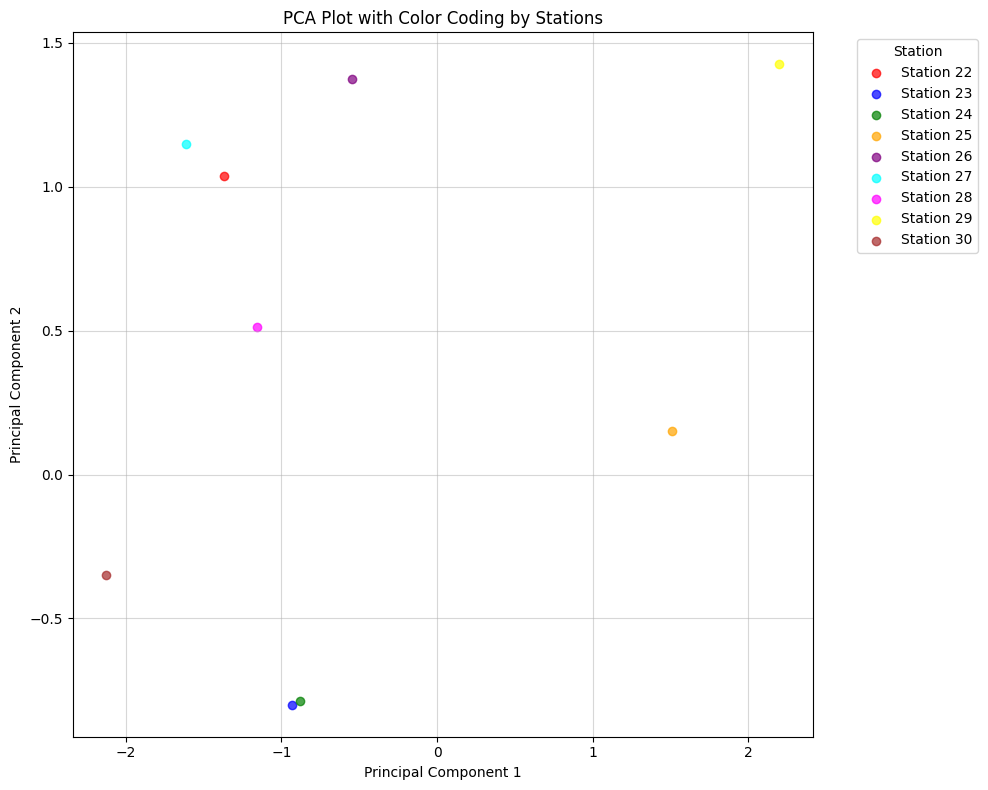

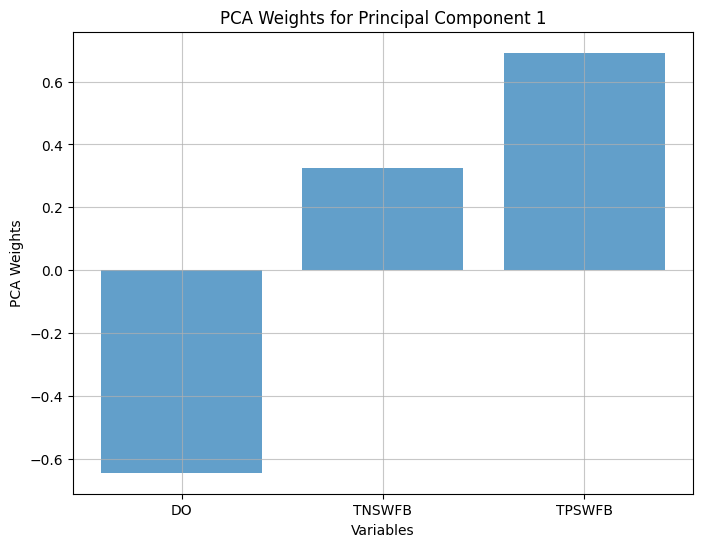

In [35]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


# lad the txt file 
file = "epa_data_condensed.txt"
data = pd.read_csv(file, delimiter='\t', skiprows=1)
data.columns = ['STATION', 'DATE', 'TIME', 'DO', 'TNSWFB', 'TPSWFB']

# Change columns to numbers
data['DO'] = pd.to_numeric(data['DO'], errors='coerce')
data['TNSWFB'] = pd.to_numeric(data['TNSWFB'], errors='coerce')
data['TPSWFB'] = pd.to_numeric(data['TPSWFB'], errors='coerce')
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# Remove rows without data
data_cleaned = data[['STATION', 'DATE','DO', 'TNSWFB', 'TPSWFB']].dropna()

data_cleaned['DATE_GROUP'] = data_cleaned['DATE'].dt.month


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned[['DO', 'TNSWFB', 'TPSWFB']])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

data_cleaned['PC1'] = pca_result[:, 0]
data_cleaned['PC2'] = pca_result[:, 1]


explained_variance = pca.explained_variance_ratio_
pca_weights = pca.components_

unique_stations = data_cleaned['STATION'].unique()
color_map = {station: color for station, color in zip(unique_stations, ['red', 'blue','green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown'])}


plt.figure(figsize=(10, 8))
for station in unique_stations: 
    station_data = data_cleaned[data_cleaned['STATION'] == station]
    if station in color_map:
        plt.scatter(station_data['PC1'], station_data['PC2'], color=color_map[station], label=f'Station {int(station)}', alpha=0.7)


#Create scatter plot of PC1 vs PC2
plt.title('PCA Plot with Color Coding by Stations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()                                                         
                                                         
# Create bar chart of PCA weights for PC1
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca_weights[0]) + 1), pca_weights[0], alpha=0.7)
plt.title('PCA Weights for Principal Component 1')
plt.xlabel('Variables')
plt.ylabel('PCA Weights')
plt.xticks(range(1, len(pca_weights[0]) + 1), ['DO', 'TNSWFB', 'TPSWFB'])
plt.grid(alpha=0.7)
plt.show()                                                
